In [1]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2          ✔ readr     2.1.4     
✔ forcats   1.0.0.9000     ✔ stringr   1.5.1     
✔ ggplot2   3.4.4          ✔ tibble    3.2.1     
✔ lubridate 1.9.2          ✔ tidyr     1.3.0     
✔ purrr     1.0.2          
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# read_syntenic_block_file <- read_delim("/home/jpm73279/genome_downloads/C4_markers/C4-genes.syntenic.blocks.tsv")

In [3]:
marker_file_paths <- c("/home/jpm73279/genome_downloads/C4_markers/Os.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Pm.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Sb.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Uf.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Zm.c4_markers.bed")

# Function to read and process the file
process_file <- function(file_path) {
  species <- substr(basename(file_path), 1, 2)
  read_delim(file_path, delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
    dplyr::select("chrom","start","end","geneID","name","type") %>%
    dplyr::mutate(species = (species))
}

# Apply the function to each file and store results in a list
list_of_dataframes <- lapply(marker_file_paths, process_file)

# Optionally combine all dataframes into one if needed
markers <- bind_rows(list_of_dataframes) %>% 
    dplyr::select(geneID,name,type,species)

Rows: 30 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 52 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 33 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 31 Columns: 6

In [4]:
###### Define a function to read the data and add columns
read_and_annotate_intersect <- function(file_path, species_abbr) {
  read_delim(file_path, delim = "\t", col_names = FALSE, col_types = "cccccccccc") %>%
    dplyr::mutate(
      species = species_abbr
    )
}

files_conditions <- list(
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/os.extended_c4_genes.acr_intersection.all.bed", species = "Os"),
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/pm.extended_c4_genes.acr_intersection.all.bed", species = "Pm"),
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/sb.extended_c4_genes.acr_intersection.all.bed", species = "Sb"),
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/uf.extended_c4_genes.acr_intersection.all.bed", species = "Uf"),
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/zm.extended_c4_genes.acr_intersection.all.bed", species = "Zm")
)

# Read and annotate each file and store results in a list
annotated_data_list <- lapply(files_conditions, function(condition) {
  read_and_annotate_intersect(condition$path, condition$species)
})

# Combine results
combined_acrs_species <- bind_rows(annotated_data_list)

all_acrs_species_types <- combined_acrs_species %>% 
    ungroup() %>% 
    dplyr::left_join(., markers, by = c("species", "X5" = "name")) %>% 
    dplyr::rename(name = X5) %>% 
    rename(enzyme_location = type,
          locus = name,
          acr_name_type = X9) %>% 
    separate(acr_name_type, into = c("acr", "acr_cell_type_specific_class"), sep = ";") %>%
    dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
                                                          acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
                                                          TRUE ~ acr_cell_type_specific_class))


# graphing_matrix_c4_genes <- all_acrs_species_types %>% 
#     group_by(species, locus, acr_cell_type_specific_class, enzyme_location) %>% 
#     summarise(n_acrs = n())

In [5]:
head(all_acrs_species_types)

X1,X2,X3,X4,locus,X6,X7,X8,acr,acr_cell_type_specific_class,X10,species,geneID,enzyme_location
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Chr1,4737626,4738127,scACR_1056,broadly_accessible,NA,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Chr1,4738483,4738984,scACR_1057,unknown_cells_1,3.57130102496339e-05,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Chr1,4742983,4743484,scACR_1058,broadly_accessible,NA,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Chr1,4744322,4744823,scACR_1059,broadly_accessible,NA,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Chr1,4745818,4746319,scACR_1060,"epidermis,protoderm,unknown_cells_1","0,7.14260204992679e-05,3.57130102496339e-05",Os,LOC_Os01g09320,mesophyll
Chr1,5898224,5911502,LOC_Os01g11054,Os__PEPC_1,Chr1,5899326,5899827,scACR_1352,mesophyll,0,Os,LOC_Os01g11054,mesophyll


In [6]:
all_acrs_species_types %>% 
    dplyr::filter(species == "Sb" & locus == "Sb__RCA_1")

X1,X2,X3,X4,locus,X6,X7,X8,acr,acr_cell_type_specific_class,X10,species,geneID,enzyme_location
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chr05,76925273,76938370,Sorbiv5.1_pg32688.valid.m24.g,Sb__RCA_1,Chr05,76925169,76925670,scACR_32468,broadly_accessible,NA,Sb,Sorbiv5.1_pg32688.valid.m24.g,bundle_sheath
Chr05,76925273,76938370,Sorbiv5.1_pg32688.valid.m24.g,Sb__RCA_1,Chr05,76928113,76928614,scACR_32469,broadly_accessible,NA,Sb,Sorbiv5.1_pg32688.valid.m24.g,bundle_sheath
Chr05,76925273,76938370,Sorbiv5.1_pg32688.valid.m24.g,Sb__RCA_1,Chr05,76935294,76935795,scACR_32470,"bundle_sheath,mesophyll","0,0",Sb,Sorbiv5.1_pg32688.valid.m24.g,bundle_sheath
Chr05,76925273,76938370,Sorbiv5.1_pg32688.valid.m24.g,Sb__RCA_1,Chr05,76937715,76938216,scACR_32471,mesophyll,0,Sb,Sorbiv5.1_pg32688.valid.m24.g,bundle_sheath


In [7]:
library(tidyverse)
library(stringr)

process_file <- function(file_info) {
  file_path <- file_info$path
  species <- file_info$species

  # Read and process the file
  read_delim(file_path, 
             col_names = c("qChr", "qStart", "qEnd", "acr_name", "pval", "refFile", "rChr", "rStart", "rEnd", "rName", "rWidth", "strand"),
             col_types = "cccccccccccc") %>%
    mutate(species = species) %>%
    separate(acr_name, into = c("acr", "acr_cell_type_specific_class", "locus"), sep = ";") %>%
    mutate(
      refFile = str_replace(refFile, "\\.all_combined_regions\\.passing_regions\\.blast_passing_regions\\.intersecting_regions\\.ref\\.frac\\.bed", ""),
      refFile = str_replace(refFile, ".*\\.vs\\.", "")
    )
}

# Define file information as a list of lists
file_infos <- list(
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Os.all.ACR_conservation.intersection.bed", species = "Os"),
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Pm.all.ACR_conservation.intersection.bed", species = "Pm"),
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Sb.all.ACR_conservation.intersection.bed", species = "Sb"),
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Uf.all.ACR_conservation.intersection.bed", species = "Uf"),
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Zm.all.ACR_conservation.intersection.bed", species = "Zm")
)

# Process each file
acr_scored_conservation <- bind_rows(lapply(file_infos, process_file)) %>% 
  dplyr::filter(rName != ".") %>% 
  tidyr::separate(rName, into = c("RefFrom", "racr_name", "rcell_type", "gene_family", "gene_family2"), sep = ";") %>% 
    dplyr::select(acr, acr_cell_type_specific_class, locus, racr_name, rcell_type , gene_family, rWidth, species) %>% 
    dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
                                                          acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
                                                          TRUE ~ acr_cell_type_specific_class))





In [8]:
head(acr_scored_conservation)

acr,acr_cell_type_specific_class,locus,racr_name,rcell_type,gene_family,rWidth,species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
scACR_1059,broadly_accessible,Os__NADPME_1,Sb_scACR_45081,broadly_accessible,NADPME,51,Os
scACR_1059,broadly_accessible,Os__NADPME_1,Sb_scACR_45081,broadly_accessible,NADPME,68,Os
scACR_1059,broadly_accessible,Os__NADPME_1,Uf_scACR_17713,broadly_accessible,NADPME,49,Os
scACR_1059,broadly_accessible,Os__NADPME_1,Zm_scACR_40643,broadly_accessible,NADPME,44,Os
scACR_1059,broadly_accessible,Os__NADPME_1,Zm_scACR_40644,broadly_accessible,NADPME,40,Os
scACR_4586,mesophyll,Os__CA_1,Uf_scACR_15989,mesophyll,CA,28,Os


In [9]:
head(all_acrs_species_types)

X1,X2,X3,X4,locus,X6,X7,X8,acr,acr_cell_type_specific_class,X10,species,geneID,enzyme_location
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Chr1,4737626,4738127,scACR_1056,broadly_accessible,NA,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Chr1,4738483,4738984,scACR_1057,unknown_cells_1,3.57130102496339e-05,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Chr1,4742983,4743484,scACR_1058,broadly_accessible,NA,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Chr1,4744322,4744823,scACR_1059,broadly_accessible,NA,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Chr1,4745818,4746319,scACR_1060,"epidermis,protoderm,unknown_cells_1","0,7.14260204992679e-05,3.57130102496339e-05",Os,LOC_Os01g09320,mesophyll
Chr1,5898224,5911502,LOC_Os01g11054,Os__PEPC_1,Chr1,5899326,5899827,scACR_1352,mesophyll,0,Os,LOC_Os01g11054,mesophyll


In [10]:
all_acrs_species_types_split_acrs <- all_acrs_species_types %>% 
    dplyr::select(locus, acr, acr_cell_type_specific_class, species, enzyme_location) %>%  
    dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
                                                          acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
                                                          TRUE ~ acr_cell_type_specific_class))



In [11]:
counting_acr_number_type <- all_acrs_species_types_split_acrs %>% 
    dplyr::ungroup() %>% 
    dplyr::group_by(locus, acr_cell_type_specific_class, species, enzyme_location) %>% 
    summarise(counts = n()) %>% 
    dplyr::ungroup()


`summarise()` has grouped output by 'locus', 'acr_cell_type_specific_class',
'species'. You can override using the `.groups` argument.


In [12]:
acrs_combined_conservation <- left_join(all_acrs_species_types_split_acrs,
          acr_scored_conservation,
          by = c("acr", "locus","acr_cell_type_specific_class", "species"))

acrs_combined_conservation_filtered <- acrs_combined_conservation %>% 
    dplyr::filter(is.na(racr_name) != TRUE)

In [13]:
counts_of_conserved_acr_by_class <- acrs_combined_conservation_filtered %>% 
    select(acr, locus, acr_cell_type_specific_class, species, 
                    enzyme_location, gene_family) %>% 
    dplyr::distinct() %>% 
    dplyr::group_by(locus, acr_cell_type_specific_class, species) %>% 
       summarise(conserved_acr_count = n()) %>% 
    dplyr::ungroup()

`summarise()` has grouped output by 'locus', 'acr_cell_type_specific_class'.
You can override using the `.groups` argument.


In [14]:
counts_of_conserved_acr_merged_acr_class <- counts_of_conserved_acr_by_class 

In [15]:
combined_acr_number_conservation_count <- full_join(counting_acr_number_type, counts_of_conserved_acr_by_class,
         by = join_by(locus, acr_cell_type_specific_class, species)) %>% 
    dplyr::mutate(conserved_acr_count = case_when(is.na(conserved_acr_count) == TRUE ~ 0,
                                                 TRUE ~ conserved_acr_count )) %>%
    dplyr::rename(total_acrs = counts) %>% 
    
    mutate(non_conserved_acrs = total_acrs - conserved_acr_count) 

### Generation of Figures Looking at the Conservation of ALL regulatory Regions

In [16]:
counts_of_conserved_acr_by_class <- combined_acr_number_conservation_count%>% 
    group_by(locus, species, enzyme_location) %>% 
    summarise(total_acrs_all = sum(total_acrs), 
             conserved_acrs_all = sum(conserved_acr_count),
             non_conserved_acrs_all = sum(non_conserved_acrs))  %>% 
    pivot_longer(cols = c(conserved_acrs_all, non_conserved_acrs_all),
        names_to = "acr_type_cons_noncons",
        values_to = "acr_counts") %>% 
    dplyr::mutate(proportion = acr_counts / total_acrs_all)
head(counts_of_conserved_acr_by_class)

`summarise()` has grouped output by 'locus', 'species'. You can override using
the `.groups` argument.


locus,species,enzyme_location,total_acrs_all,acr_type_cons_noncons,acr_counts,proportion
<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
Os__AlaAT_1,Os,mesophyll,1,conserved_acrs_all,0,0.0000000
Os__AlaAT_1,Os,mesophyll,1,non_conserved_acrs_all,1,1.0000000
Os__AlaAT_2,Os,mesophyll,6,conserved_acrs_all,2,0.3333333
Os__AlaAT_2,Os,mesophyll,6,non_conserved_acrs_all,4,0.6666667
Os__AlaAT_3,Os,mesophyll,4,conserved_acrs_all,2,0.5000000
Os__AlaAT_3,Os,mesophyll,4,non_conserved_acrs_all,2,0.5000000


In [17]:
combined_gene_family_merged_cell_types <- counts_of_conserved_acr_by_class %>% 
    #dplyr::filter(is.na(number_passing_loci) != TRUE) %>% 
    tidyr::separate(locus, into = c("species_other", "loci"), sep = "__",remove = FALSE) %>%
    tidyr::separate(loci, into = c("gene_family", "number"), sep = "_", remove = FALSE)

head(combined_gene_family_merged_cell_types)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 2 rows [209, 210].”


locus,species_other,loci,gene_family,number,species,enzyme_location,total_acrs_all,acr_type_cons_noncons,acr_counts,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
Os__AlaAT_1,Os,AlaAT_1,AlaAT,1,Os,mesophyll,1,conserved_acrs_all,0,0.0000000
Os__AlaAT_1,Os,AlaAT_1,AlaAT,1,Os,mesophyll,1,non_conserved_acrs_all,1,1.0000000
Os__AlaAT_2,Os,AlaAT_2,AlaAT,2,Os,mesophyll,6,conserved_acrs_all,2,0.3333333
Os__AlaAT_2,Os,AlaAT_2,AlaAT,2,Os,mesophyll,6,non_conserved_acrs_all,4,0.6666667
Os__AlaAT_3,Os,AlaAT_3,AlaAT,3,Os,mesophyll,4,conserved_acrs_all,2,0.5000000
Os__AlaAT_3,Os,AlaAT_3,AlaAT,3,Os,mesophyll,4,non_conserved_acrs_all,2,0.5000000


In [18]:
combined_gene_family_merged_cell_types %>% 
    dplyr::filter(species == "Sb" & gene_family == "RCA")

locus,species_other,loci,gene_family,number,species,enzyme_location,total_acrs_all,acr_type_cons_noncons,acr_counts,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
Sb__RCA_1,Sb,RCA_1,RCA,1,Sb,bundle_sheath,4,conserved_acrs_all,1,0.25
Sb__RCA_1,Sb,RCA_1,RCA,1,Sb,bundle_sheath,4,non_conserved_acrs_all,3,0.75


In [20]:
head(combined_gene_family_merged_cell_types_graphing)

locus,species_other,loci,gene_family,number,species,enzyme_location,total_acrs_all,acr_type_cons_noncons,acr_counts,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
Os AlaAT 1,Os,AlaAT_1,AlaAT,1,Os,mesophyll,1,conserved_acrs_all,0,0.0000000
Os AlaAT 1,Os,AlaAT_1,AlaAT,1,Os,mesophyll,1,non_conserved_acrs_all,1,1.0000000
Os AlaAT 2,Os,AlaAT_2,AlaAT,2,Os,mesophyll,6,conserved_acrs_all,2,0.3333333
Os AlaAT 2,Os,AlaAT_2,AlaAT,2,Os,mesophyll,6,non_conserved_acrs_all,4,0.6666667
Os AlaAT 3,Os,AlaAT_3,AlaAT,3,Os,mesophyll,4,conserved_acrs_all,2,0.5000000
Os AlaAT 3,Os,AlaAT_3,AlaAT,3,Os,mesophyll,4,non_conserved_acrs_all,2,0.5000000


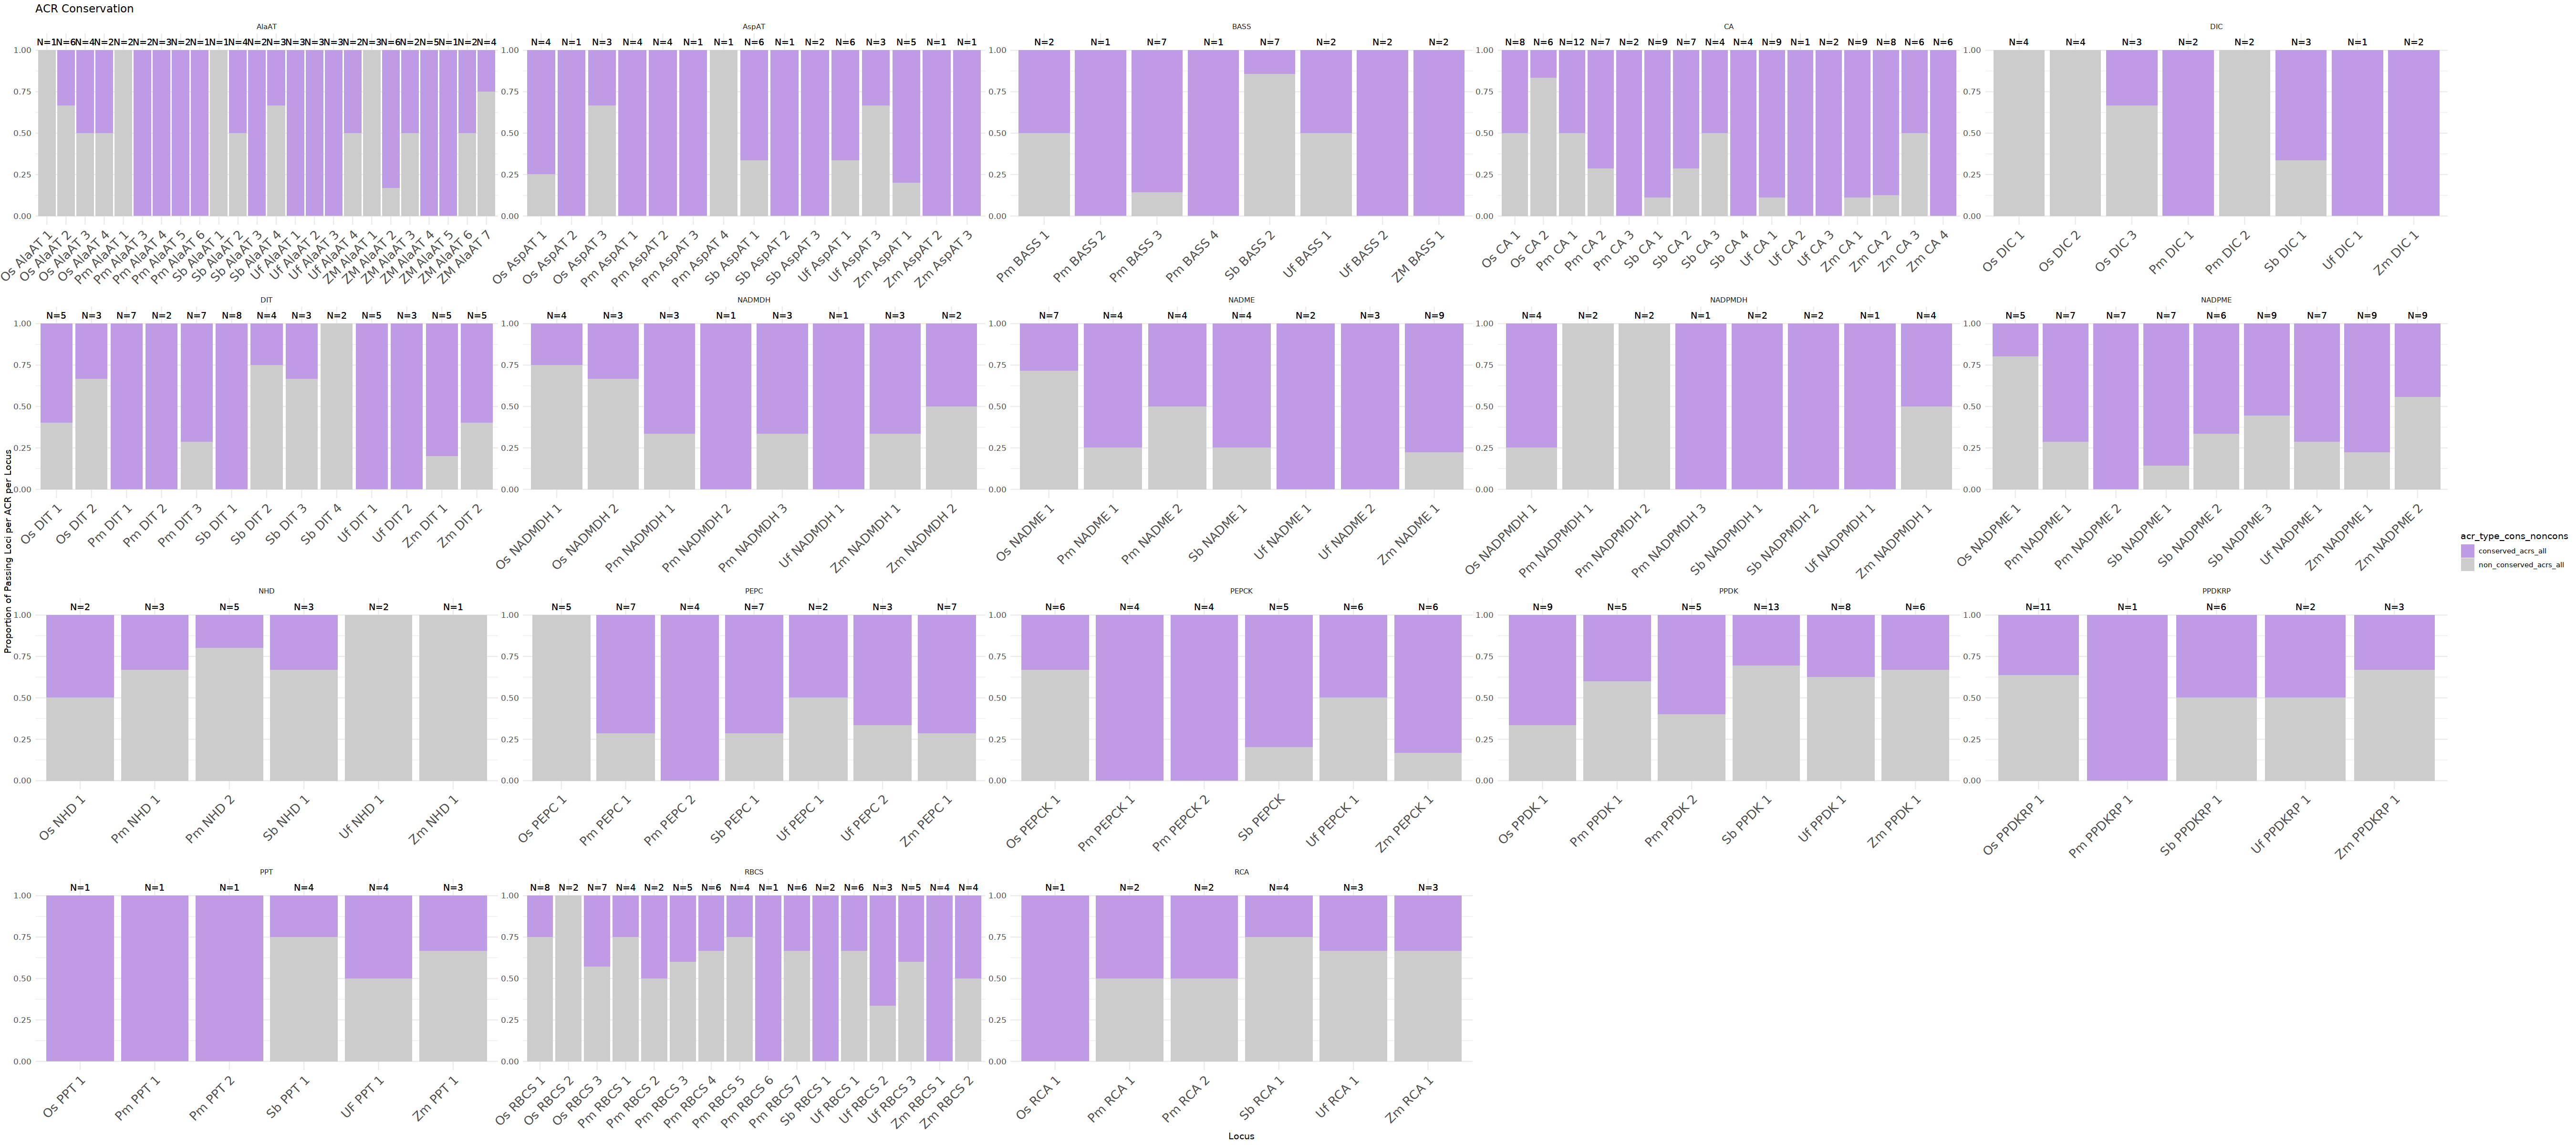

In [68]:
colors <- c("#bf9ae5", "#CCCCCC")
combined_gene_family_merged_cell_types_graphing <- combined_gene_family_merged_cell_types
combined_gene_family_merged_cell_types_graphing$locus <- gsub("__", " ", combined_gene_family_merged_cell_types$locus)
combined_gene_family_merged_cell_types_graphing$locus <- gsub("_", " ", combined_gene_family_merged_cell_types_graphing$locus)


unique_locus_data <- combined_gene_family_merged_cell_types_graphing %>%
  distinct(locus, gene_family, total_acrs_all) %>% 
  dplyr::mutate(y_val = 1.05)


options(repr.plot.width=45, repr.plot.height=20)
# Generate the barplot
all_acr_conservation_family <- ggplot(combined_gene_family_merged_cell_types_graphing, aes(x = locus, y = proportion, fill = acr_type_cons_noncons)) +
  geom_bar(stat = "identity") +
   labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
   theme_minimal() +
  geom_text(aes(y=1.05,label = paste0("N=", total_acrs_all), group = locus),
            hjust=0.5
            ) + 
  facet_wrap(.~gene_family, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 15),
       axis.text.y = element_text(size = 10)) + 
    ggtitle("ACR Conservation") + 
    scale_fill_manual(values = colors) # Repeating colors for each subcategory# Adjust text angle and size for better readability

all_acr_conservation_family

In [69]:
ggsave(filename = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_5/realtive_conservation.all_ACRs.pdf", 
       plot = all_acr_conservation_family, device = "pdf", width = 35, height = 20)


In [76]:
combined_gene_family_merged_cell_types_graphing %>% 
    dplyr::filter(gene_family == "NADPME")

locus,species_other,loci,gene_family,number,species,enzyme_location,total_acrs_all,acr_type_cons_noncons,acr_counts,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
Os NADPME 1,Os,NADPME_1,NADPME,1,Os,mesophyll,5,conserved_acrs_all,1,0.2000000
Os NADPME 1,Os,NADPME_1,NADPME,1,Os,mesophyll,5,non_conserved_acrs_all,4,0.8000000
Pm NADPME 1,Pm,NADPME_1,NADPME,1,Pm,bundle_sheath,7,conserved_acrs_all,5,0.7142857
Pm NADPME 1,Pm,NADPME_1,NADPME,1,Pm,bundle_sheath,7,non_conserved_acrs_all,2,0.2857143
Pm NADPME 2,Pm,NADPME_2,NADPME,2,Pm,bundle_sheath,7,conserved_acrs_all,7,1.0000000
Pm NADPME 2,Pm,NADPME_2,NADPME,2,Pm,bundle_sheath,7,non_conserved_acrs_all,0,0.0000000
Sb NADPME 1,Sb,NADPME_1,NADPME,1,Sb,bundle_sheath,7,conserved_acrs_all,6,0.8571429
Sb NADPME 1,Sb,NADPME_1,NADPME,1,Sb,bundle_sheath,7,non_conserved_acrs_all,1,0.1428571
Sb NADPME 2,Sb,NADPME_2,NADPME,2,Sb,bundle_sheath,6,conserved_acrs_all,4,0.6666667


### Generation of Figures looking at CELL TYPE SPECIFIC CONSERVATION of regulatory regions

In [51]:
combined_acr_number_conservation_count_longer <- combined_acr_number_conservation_count %>% 
     pivot_longer(cols = c(conserved_acr_count, non_conserved_acrs),
        names_to = "acr_class",
        values_to = "acr_count") %>% 
    dplyr::mutate(proportion = acr_count / total_acrs)

In [52]:
combined_gene_family <- combined_acr_number_conservation_count_longer %>% 
    #dplyr::filter(is.na(number_passing_loci) != TRUE) %>% 
    tidyr::separate(locus, into = c("species", "loci"), sep = "__",remove = FALSE) %>%
    tidyr::separate(loci, into = c("gene_family", "number"), sep = "_", remove = FALSE) %>% 
    dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
                                                          acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
                                                           
                                                          TRUE ~ acr_cell_type_specific_class))

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 4 rows [405, 406, 407,
408].”


In [53]:
unique(combined_gene_family$acr_cell_type_specific_class)

[1] "broadly_accessible"                          
 [2] "bundle_sheath,mesophyll"                     
 [3] "mesophyll"                                   
 [4] "unknown_cells_2"                             
 [5] "protoderm"                                   
 [6] "bundle_sheath,epidermis,mesophyll"           
 [7] "epidermis,unknown_cells_1"                   
 [8] "bundle_sheath,companion_cell"                
 [9] "bundle_sheath,unknown_cells_2"               
[10] "epidermis,protoderm,unknown_cells_1"         
[11] "unknown_cells_1"                             
[12] "bundle_sheath"                               
[13] "epidermis"                                   
[14] "mesophyll,unknown_cells_2"                   
[15] "bundle_sheath,mesophyll,unknown_cells_2"     
[16] "epidermis,protoderm"                         
[17] "bundle_sheath,companion_cells_sieve_elements"
[18] "companion_cells_sieve_elements"              
[19] "procambium"                                  
[20] "procambial_meristem"                         
[21] "bundle_sheath,mesophyll,procambial_meristem" 
[22] "epidermis,mesophyll"                         
[23] "epidermis,mesophyll,protoderm"               
[24] "bundle_sheath,epidermis"

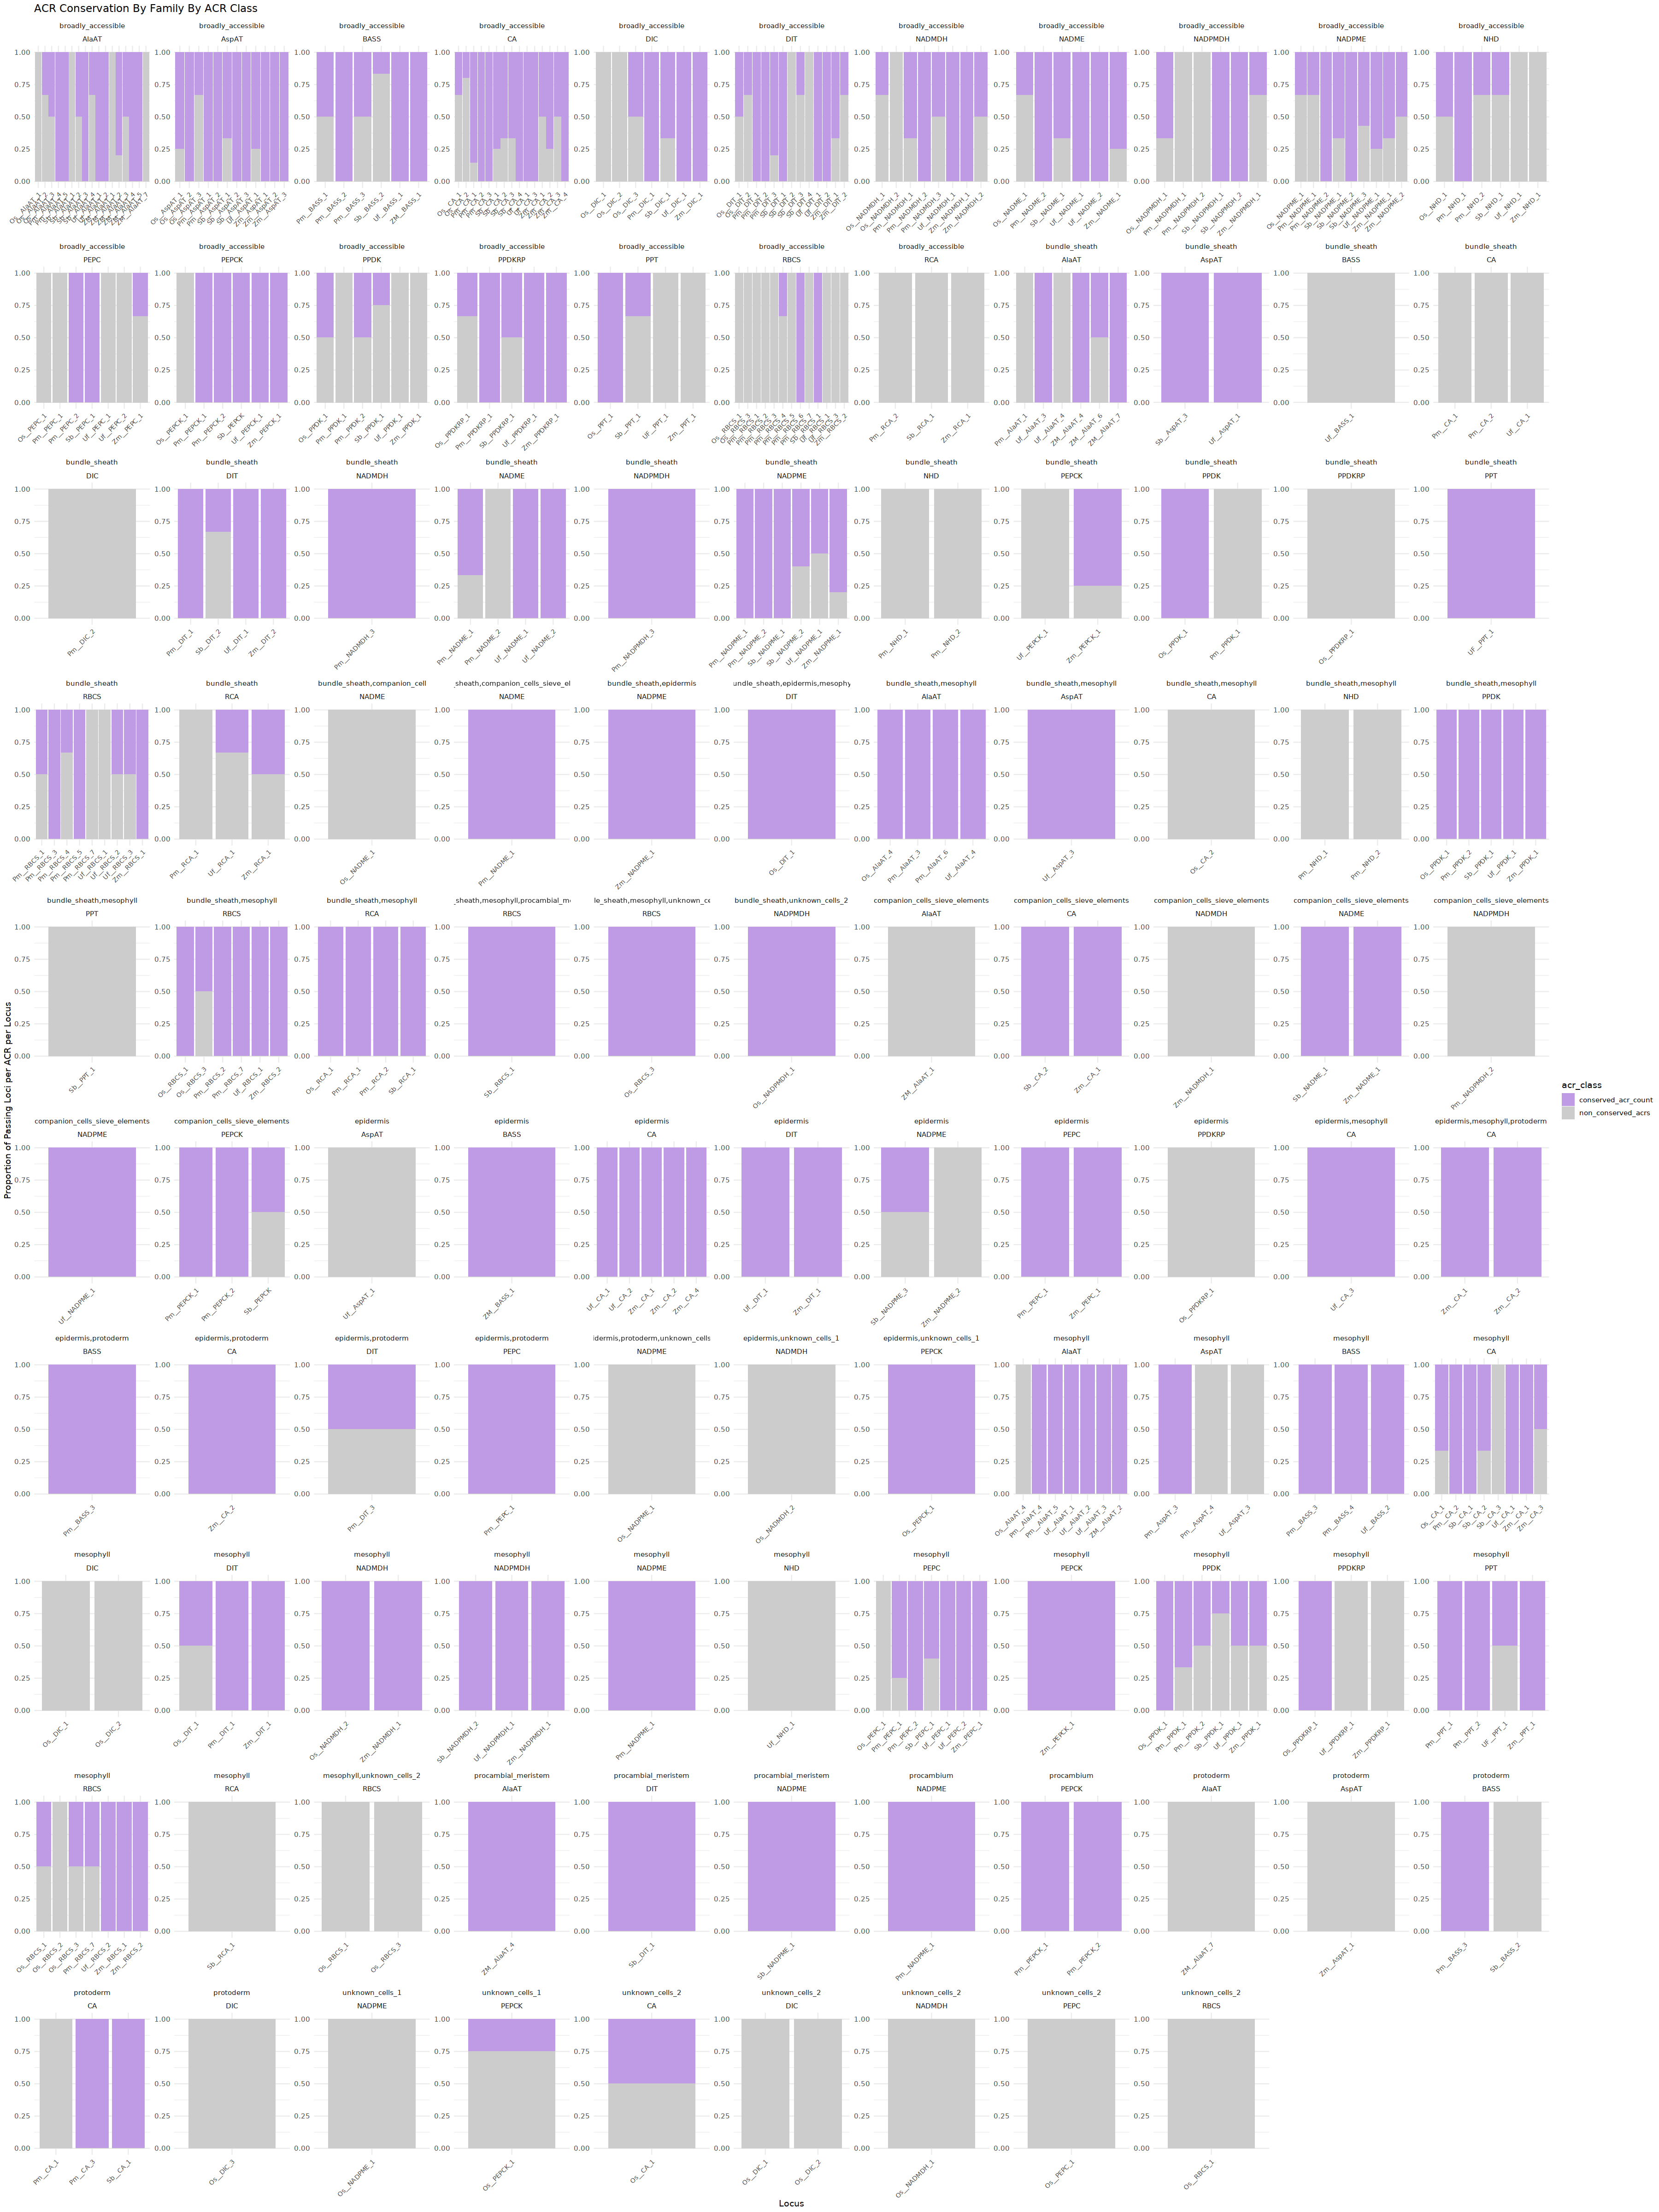

In [54]:
options(repr.plot.width=30, repr.plot.height=40)
# Generate the barplot
ggplot(combined_gene_family, aes(x = locus, y = proportion, fill = acr_class)) +
  geom_bar(stat = "identity") +
  #geom_text(vjust = -0.5, position = position_dodge(width = 0.9)) +
   labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
   theme_minimal() +
  facet_wrap(acr_cell_type_specific_class~gene_family, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) + 
    ggtitle("ACR Conservation By Family By ACR Class") +  # Adjust text angle and size for better readability
    scale_fill_manual(values = colors) # Repeating colors for each subcategory# Adjust text angle and size for better readability

## Do Cell Type Specific ACR Conservation


In [55]:

## Allow each ACR to be counted as being either BS or MS specific
mesophyll_copies_of_acrs <- combined_gene_family %>% 
    dplyr::filter(acr_cell_type_specific_class == "bundle_sheath,mesophyll") %>% 
    dplyr::mutate(acr_cell_type_specific_class = "mesophyll")

bundle_sheath_copies_of_acrs <- combined_gene_family %>% 
    dplyr::filter(acr_cell_type_specific_class %in% c("bundle_sheath,mesophyll", "bundle_sheath,mesophyll,procambial_meristem")) %>% 
    dplyr::mutate(acr_cell_type_specific_class = "bundle_sheath")

In [71]:
head(bs_acrs_conserved_non_conserved)

locus,species,loci,gene_family,number,acr_cell_type_specific_class,enzyme_location,acr_class,total_acrs,acr_count,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
Os AlaAT 4,Os,AlaAT_4,AlaAT,4,bundle_sheath,mesophyll,conserved_acr_count,1,1,1
Os AlaAT 4,Os,AlaAT_4,AlaAT,4,bundle_sheath,mesophyll,non_conserved_acrs,1,0,0
Os CA 2,Os,CA_2,CA,2,bundle_sheath,mesophyll,conserved_acr_count,1,0,0
Os CA 2,Os,CA_2,CA,2,bundle_sheath,mesophyll,non_conserved_acrs,1,1,1
Os PPDK 1,Os,PPDK_1,PPDK,1,bundle_sheath,mesophyll,conserved_acr_count,1,1,1
Os PPDK 1,Os,PPDK_1,PPDK,1,bundle_sheath,mesophyll,non_conserved_acrs,1,0,0


`summarise()` has grouped output by 'locus', 'species', 'loci', 'gene_family',
'number', 'acr_cell_type_specific_class', 'enzyme_location'. You can override
using the `.groups` argument.


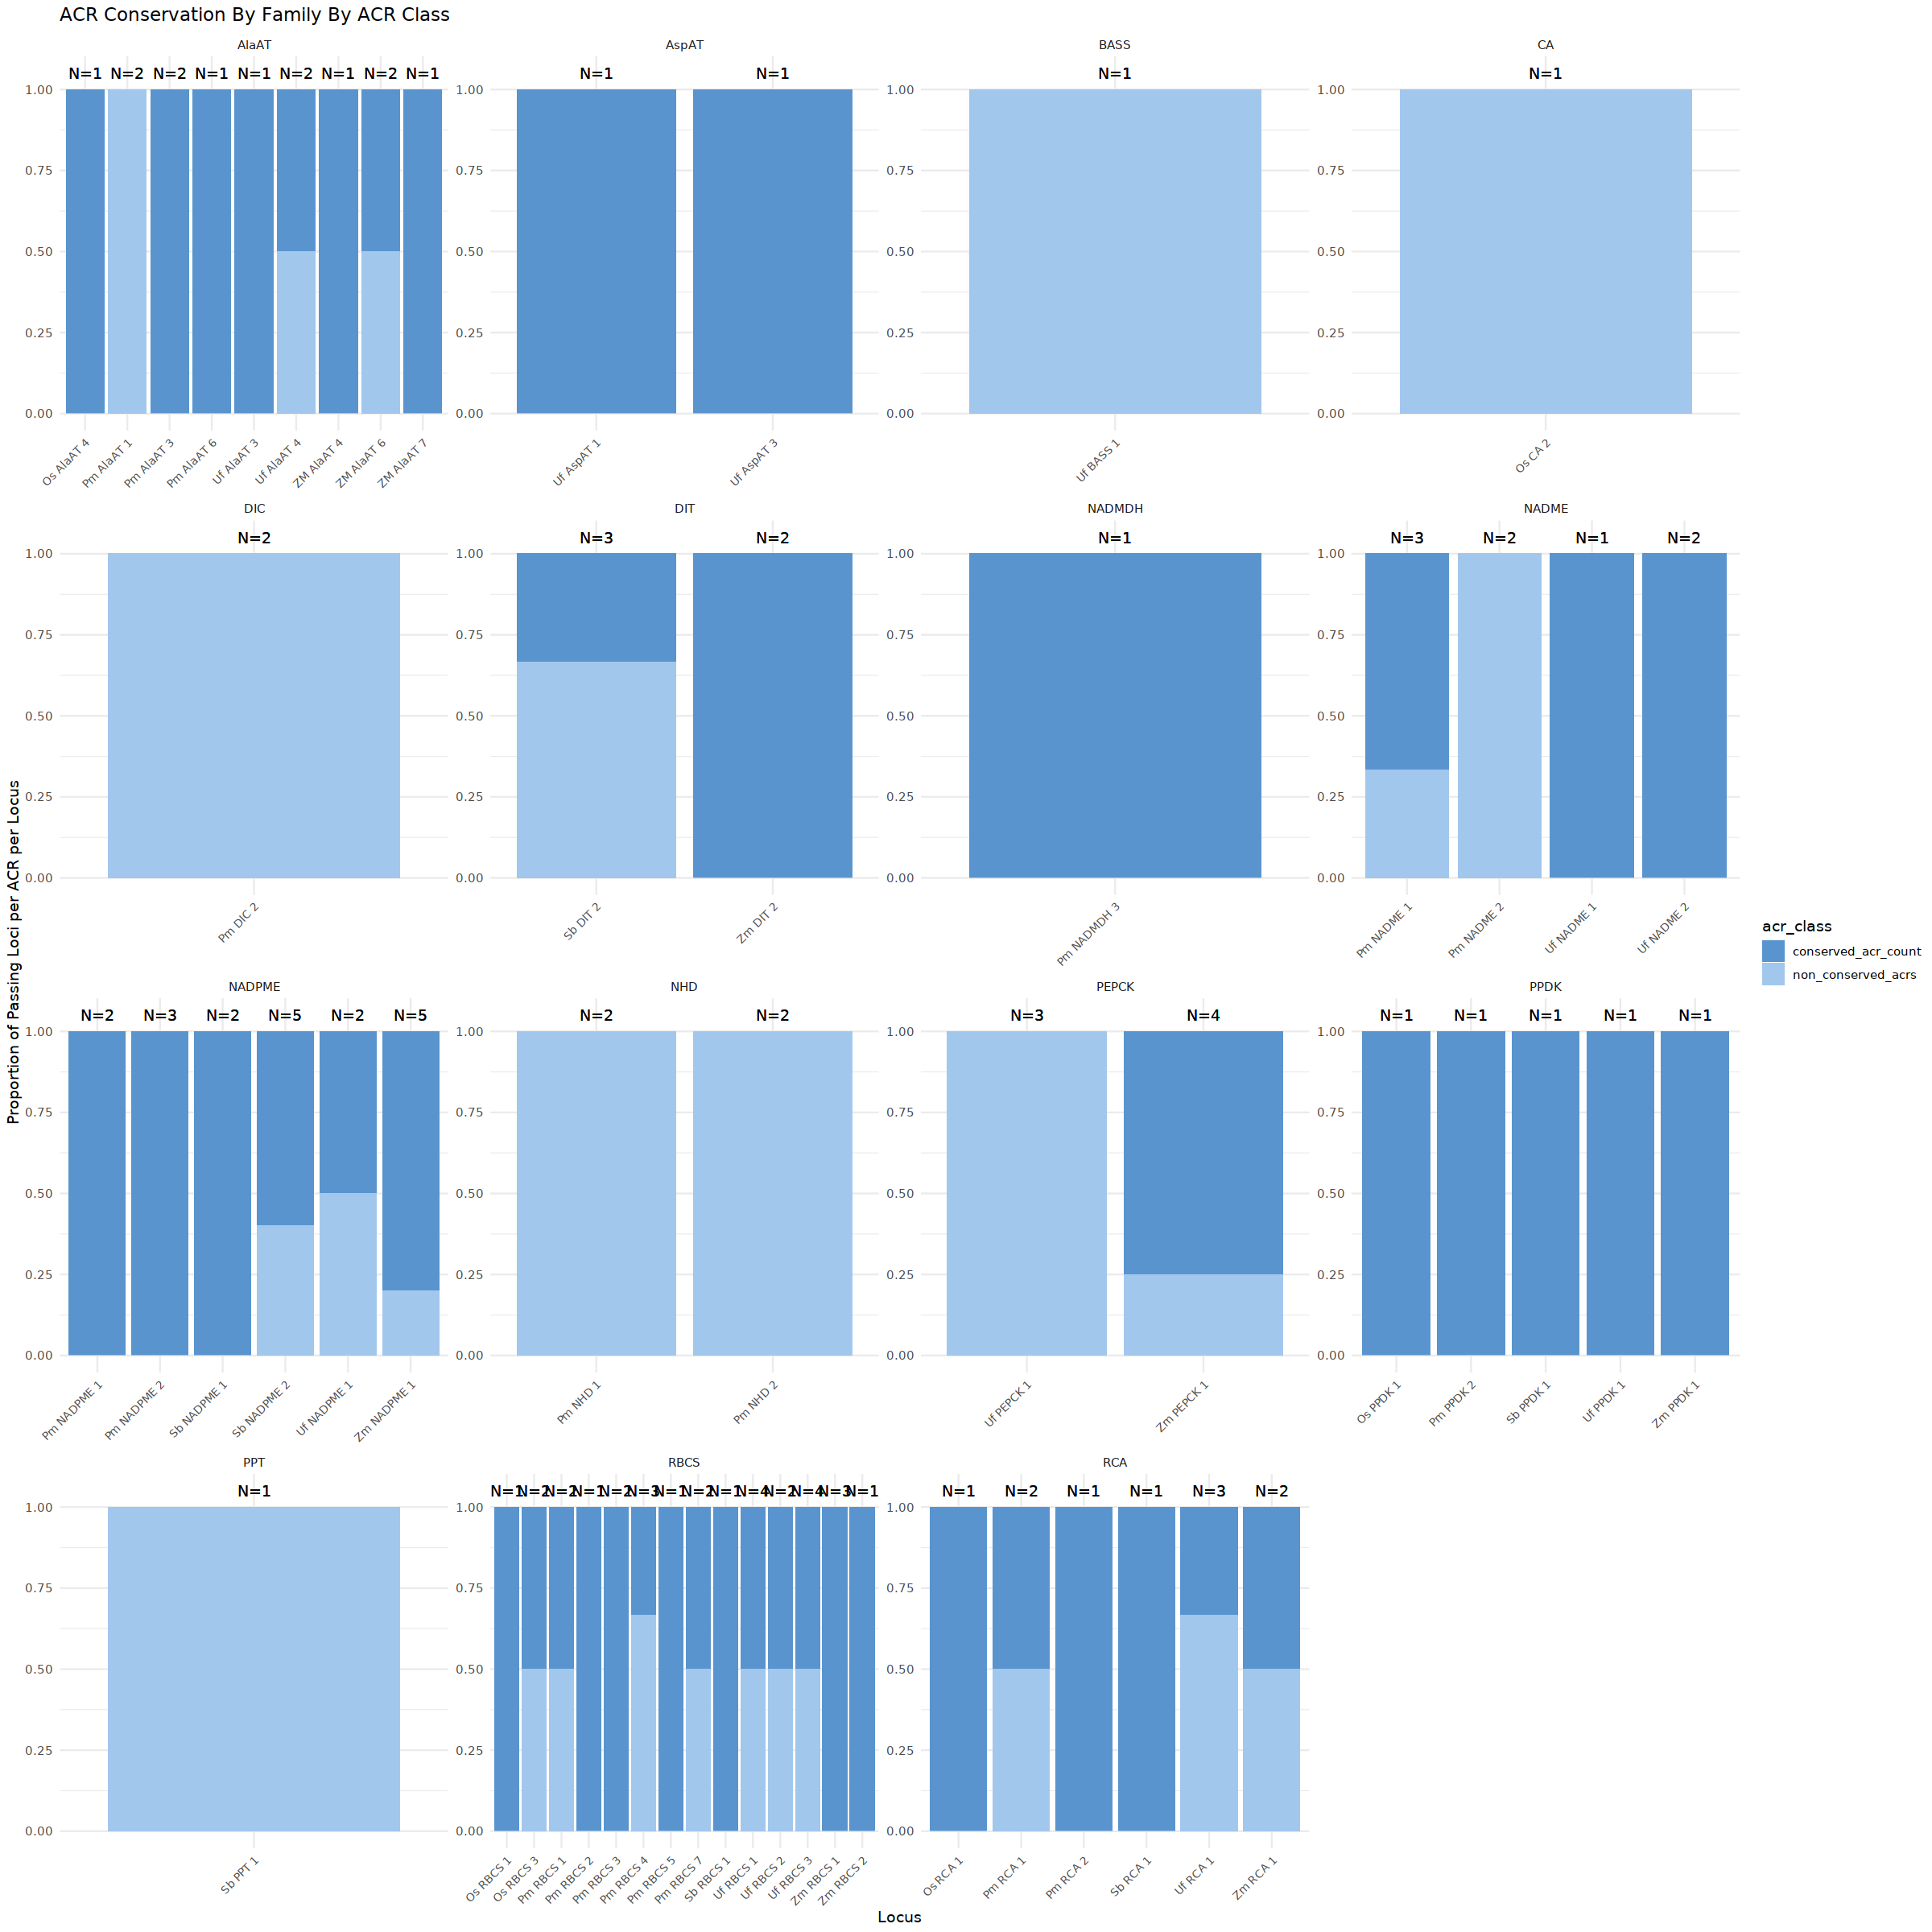

In [72]:
bs_specific_ACRs_bs_specific_enzymes <- combined_gene_family %>% 
    dplyr::filter(acr_cell_type_specific_class == "bundle_sheath" & enzyme_location %in% c("bundle_sheath", "mesophyll,bundle_sheath"))

bs_specific_ACRs_bs_specific_enzymes <- bind_rows(bs_specific_ACRs_bs_specific_enzymes, bundle_sheath_copies_of_acrs)

bs_acrs_conserved_non_conserved <- bs_specific_ACRs_bs_specific_enzymes %>% 
    dplyr::group_by(locus, species, loci, gene_family, number, acr_cell_type_specific_class,enzyme_location, acr_class) %>% 
    dplyr::summarise(total_acrs = sum(total_acrs), 
                    acr_count = sum(acr_count)) %>% 
    dplyr::mutate(proportion = acr_count/total_acrs)


bs_acrs_conserved_non_conserved$locus <- gsub("__", " ", bs_acrs_conserved_non_conserved$locus)
bs_acrs_conserved_non_conserved$locus <- gsub("_", " ", bs_acrs_conserved_non_conserved$locus)


options(repr.plot.width=20, repr.plot.height=20)
colors <- c("conserved_acr_count" = "#5994CF", "non_conserved_acrs" = "#a2c7ed")
# Generate the barplot
conservation_plots_bs_regions <- ggplot(bs_acrs_conserved_non_conserved, aes(x = locus, y = proportion, fill = acr_class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(y=1.05,label = paste0("N=", total_acrs), group = locus),
            hjust=0.5
            ) + 
   labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
   theme_minimal() +
  facet_wrap(.~gene_family, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) + 
    ggtitle("ACR Conservation By Family By ACR Class") +  # Adjust text angle and size for better readability
  scale_fill_manual(values = colors)  # Use the defined colors

conservation_plots_bs_regions

In [73]:
ggsave(filename = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_5/realtive_conservation.BS_ACRs.pdf", 
       plot = conservation_plots_bs_regions, device = "pdf", width = 30, height = 20)


In [77]:
bs_acrs_conserved_non_conserved %>% 
    dplyr::filter(gene_family == "NADPME")

locus,species,loci,gene_family,number,acr_cell_type_specific_class,enzyme_location,acr_class,total_acrs,acr_count,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
Pm NADPME 1,Pm,NADPME_1,NADPME,1,bundle_sheath,bundle_sheath,conserved_acr_count,2,2,1.0
Pm NADPME 1,Pm,NADPME_1,NADPME,1,bundle_sheath,bundle_sheath,non_conserved_acrs,2,0,0.0
Pm NADPME 2,Pm,NADPME_2,NADPME,2,bundle_sheath,bundle_sheath,conserved_acr_count,3,3,1.0
Pm NADPME 2,Pm,NADPME_2,NADPME,2,bundle_sheath,bundle_sheath,non_conserved_acrs,3,0,0.0
Sb NADPME 1,Sb,NADPME_1,NADPME,1,bundle_sheath,bundle_sheath,conserved_acr_count,2,2,1.0
Sb NADPME 1,Sb,NADPME_1,NADPME,1,bundle_sheath,bundle_sheath,non_conserved_acrs,2,0,0.0
Sb NADPME 2,Sb,NADPME_2,NADPME,2,bundle_sheath,bundle_sheath,conserved_acr_count,5,3,0.6
Sb NADPME 2,Sb,NADPME_2,NADPME,2,bundle_sheath,bundle_sheath,non_conserved_acrs,5,2,0.4
Uf NADPME 1,Uf,NADPME_1,NADPME,1,bundle_sheath,bundle_sheath,conserved_acr_count,2,1,0.5


`summarise()` has grouped output by 'locus', 'species', 'loci', 'gene_family',
'number', 'acr_cell_type_specific_class', 'enzyme_location'. You can override
using the `.groups` argument.


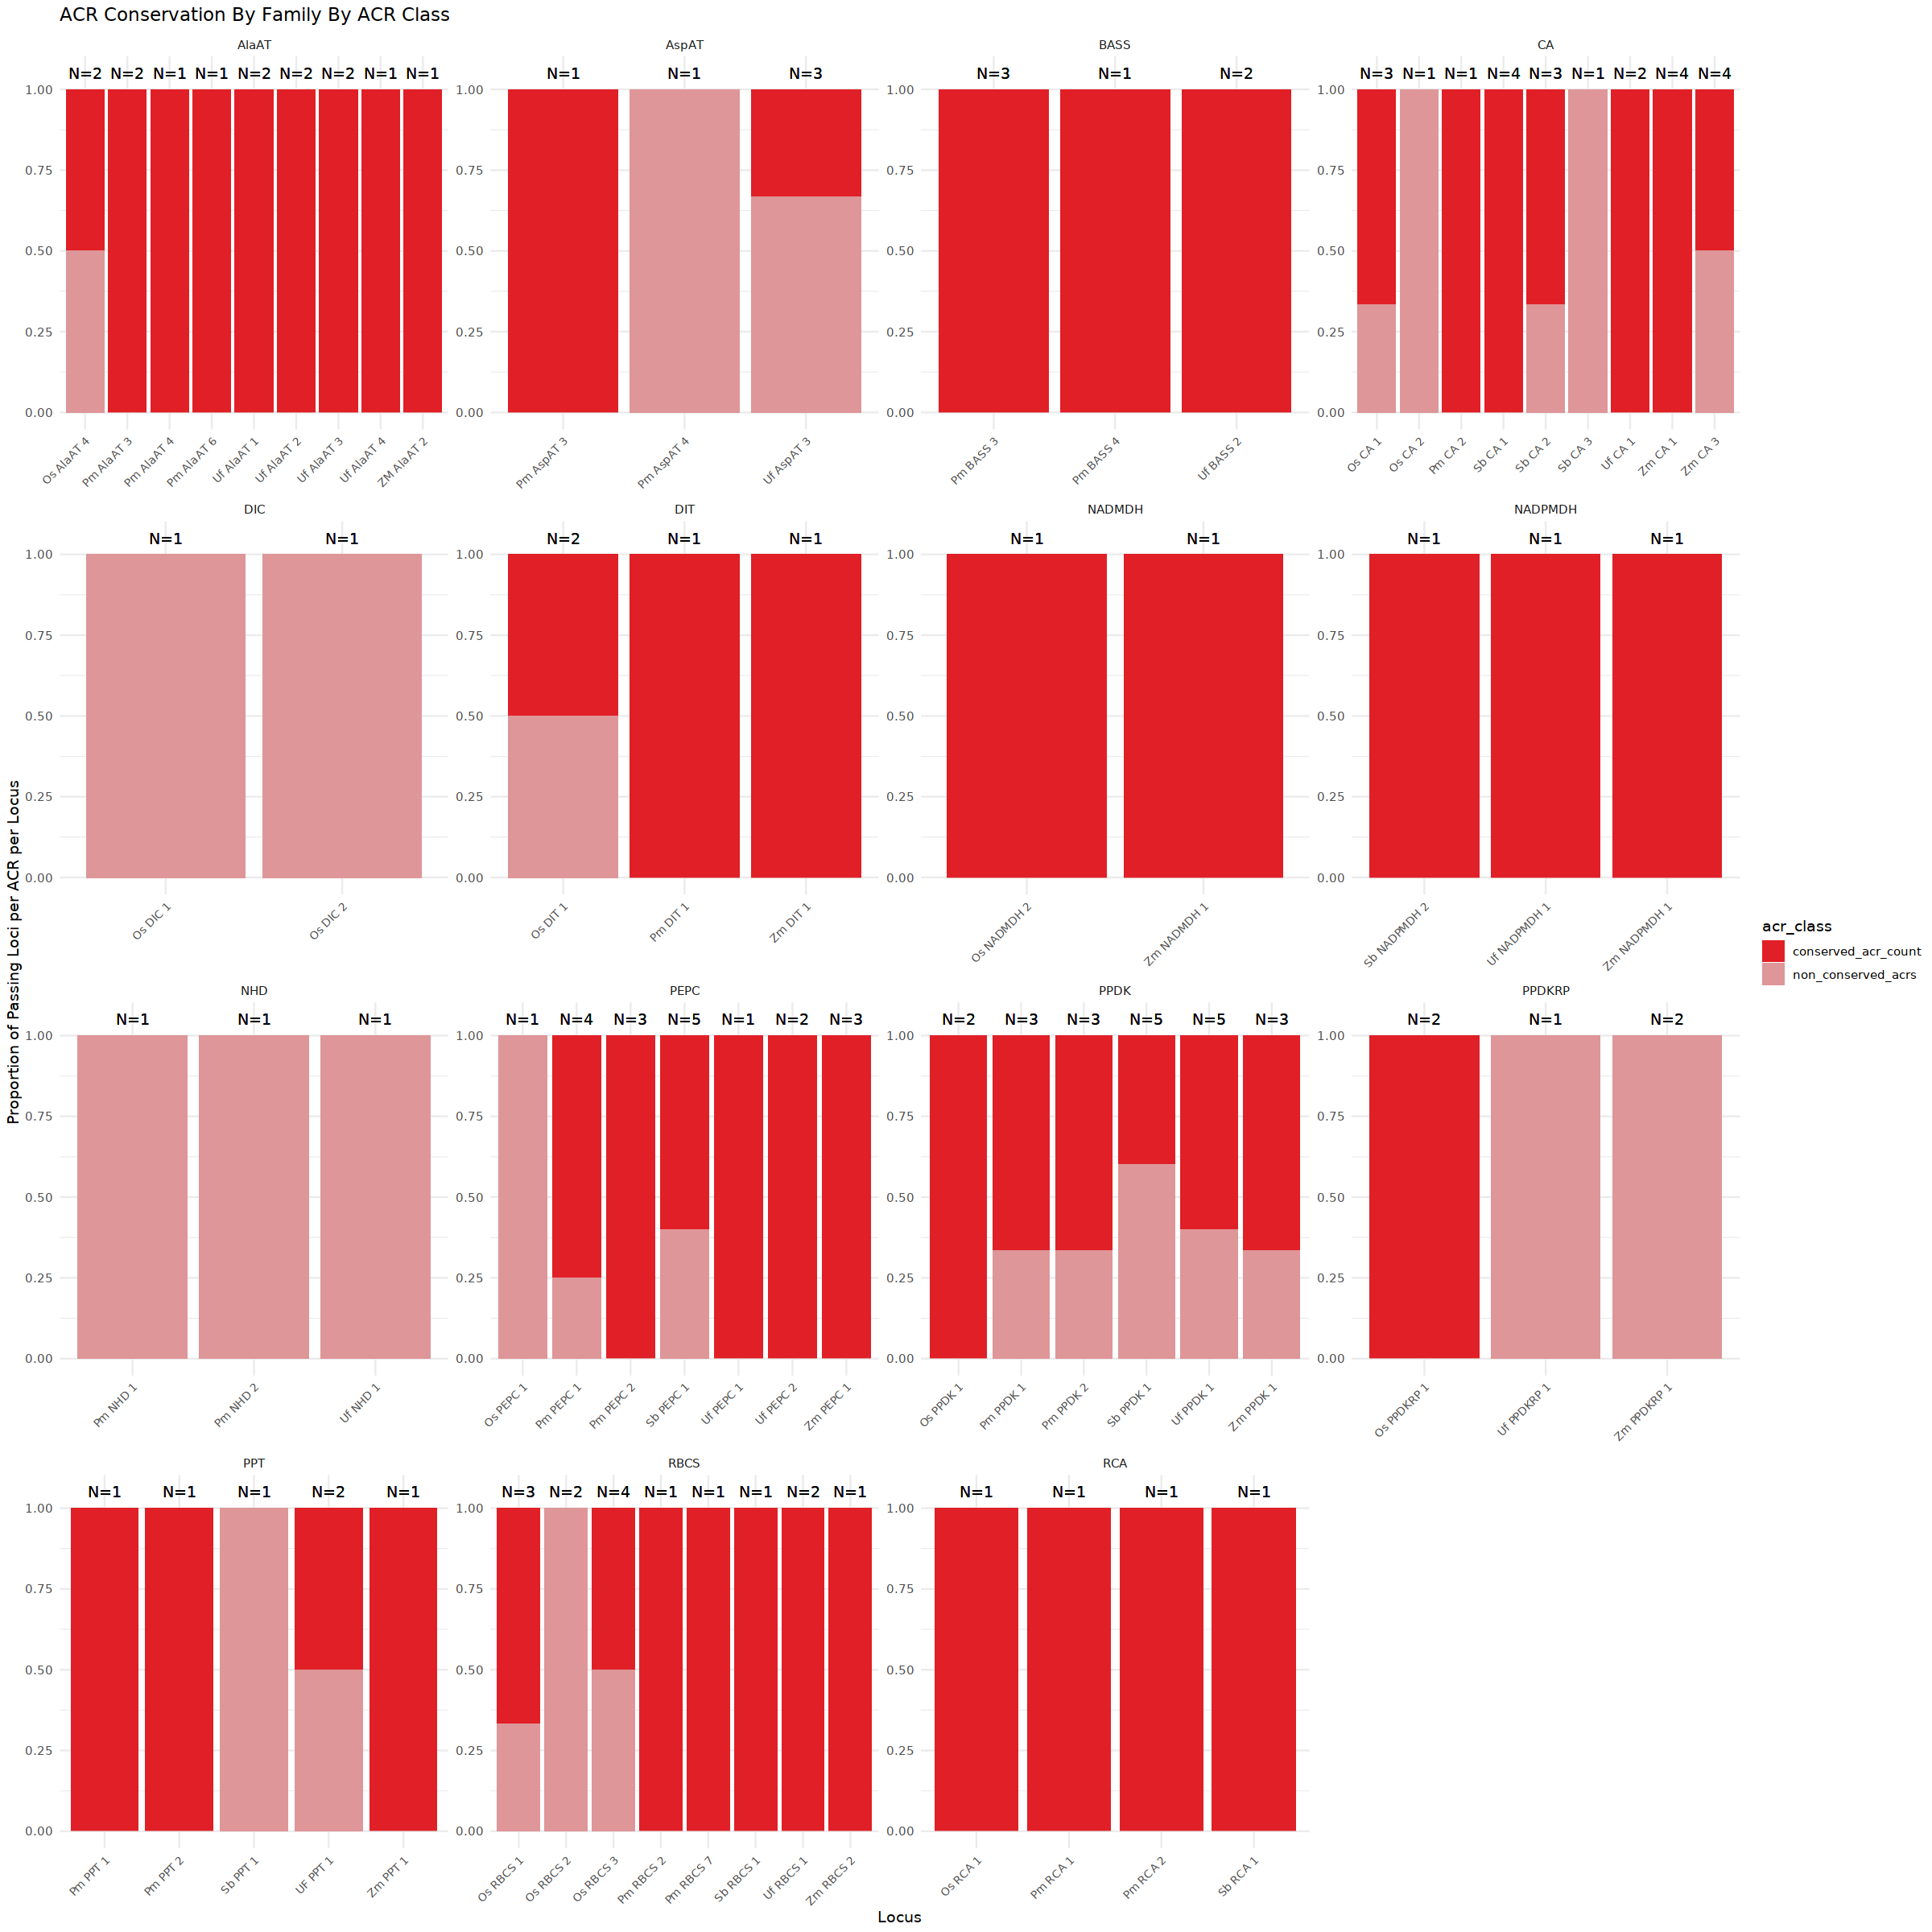

In [74]:
ms_specific_ACRs_ms_specific_enzymes <- combined_gene_family %>% 
    dplyr::filter(acr_cell_type_specific_class == "mesophyll" & enzyme_location %in% c("mesophyll", "mesophyll,bundle_sheath", "bundle_sheath,mesophyll,procambial_meristem"))


mesophyll_copies_of_acrs <- combined_gene_family %>% 
    dplyr::filter(acr_cell_type_specific_class %in% c("bundle_sheath,mesophyll", "bundle_sheath,mesophyll,procambial_meristem")) %>% 
    dplyr::mutate(acr_cell_type_specific_class = "mesophyll")



ms_specific_ACRs_bs_specific_enzymes <- bind_rows(ms_specific_ACRs_ms_specific_enzymes, mesophyll_copies_of_acrs)

ms_acrs_conserved_non_conserved <- ms_specific_ACRs_bs_specific_enzymes %>% 
    dplyr::group_by(locus, species, loci, gene_family, number, acr_cell_type_specific_class,enzyme_location, acr_class) %>% 
    dplyr::summarise(total_acrs = sum(total_acrs), 
                    acr_count = sum(acr_count)) %>% 
    dplyr::mutate(proportion = acr_count/total_acrs)


ms_acrs_conserved_non_conserved$locus <- gsub("__", " ", ms_acrs_conserved_non_conserved$locus)
ms_acrs_conserved_non_conserved$locus <- gsub("_", " ", ms_acrs_conserved_non_conserved$locus)



options(repr.plot.width=20, repr.plot.height=20)
colors <- c("conserved_acr_count" = "#E11F26", "non_conserved_acrs" = "#de9699")
# Generate the barplot
conservation_plots_ms_regions <- ggplot(ms_acrs_conserved_non_conserved, aes(x = locus, y = proportion, fill = acr_class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(y=1.05,label = paste0("N=", total_acrs), group = locus),
            hjust=0.5
            ) + 
   labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
   theme_minimal() +
  facet_wrap(.~gene_family, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) + 
    ggtitle("ACR Conservation By Family By ACR Class") +  # Adjust text angle and size for better readability
  scale_fill_manual(values = colors)  # Use the defined colors

conservation_plots_ms_regions

In [75]:
ggsave(filename = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_5/realtive_conservation.MS_ACRs.pdf", 
       plot = conservation_plots_ms_regions, device = "pdf", width = 30, height = 20)


## Testing Convseration By Enzyme Class

In [34]:
enzyme_family_class <- data.frame(gene_family=c("AlaAT", "AspAT", "CA", "DIC", "DIT", "NADMDH", "NADME", "NADPMDH", "NADPME", "NHD", "PEPCK", "PEPC", "PPDKRP", "PPDK", "PPT", "RBCS", "RCA", "BASS"),
           Type=c("variable", "variable", "core", "core", "variable", "variable", "variable", "variable", "variable", "variable", "core", "core", "core", "core", "core", "core", "core", "variable"))


In [1]:
head(enzyme_family_class)

ERROR: Error in head(enzyme_family_class): object 'enzyme_family_class' not found


In [50]:
combined_gene_family_class <- left_join(combined_gene_family_merged_cell_types_graphing, enzyme_family_class, by = c("gene_family"))

In [57]:
head(combined_gene_family_class)

locus,species_other,loci,gene_family,number,species,enzyme_location,total_acrs_all,acr_type_cons_noncons,acr_counts,proportion,Type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
Os AlaAT 1,Os,AlaAT_1,AlaAT,1,Os,mesophyll,1,conserved_acrs_all,0,0.0000000,variable
Os AlaAT 1,Os,AlaAT_1,AlaAT,1,Os,mesophyll,1,non_conserved_acrs_all,1,1.0000000,variable
Os AlaAT 2,Os,AlaAT_2,AlaAT,2,Os,mesophyll,6,conserved_acrs_all,2,0.3333333,variable
Os AlaAT 2,Os,AlaAT_2,AlaAT,2,Os,mesophyll,6,non_conserved_acrs_all,4,0.6666667,variable
Os AlaAT 3,Os,AlaAT_3,AlaAT,3,Os,mesophyll,4,conserved_acrs_all,2,0.5000000,variable
Os AlaAT 3,Os,AlaAT_3,AlaAT,3,Os,mesophyll,4,non_conserved_acrs_all,2,0.5000000,variable


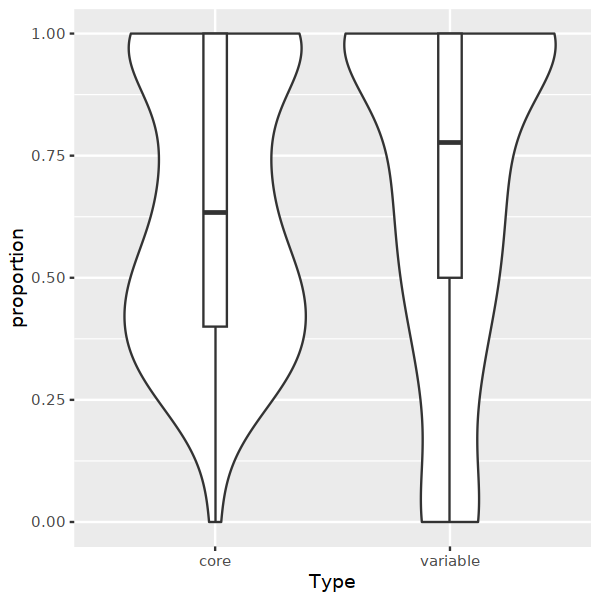

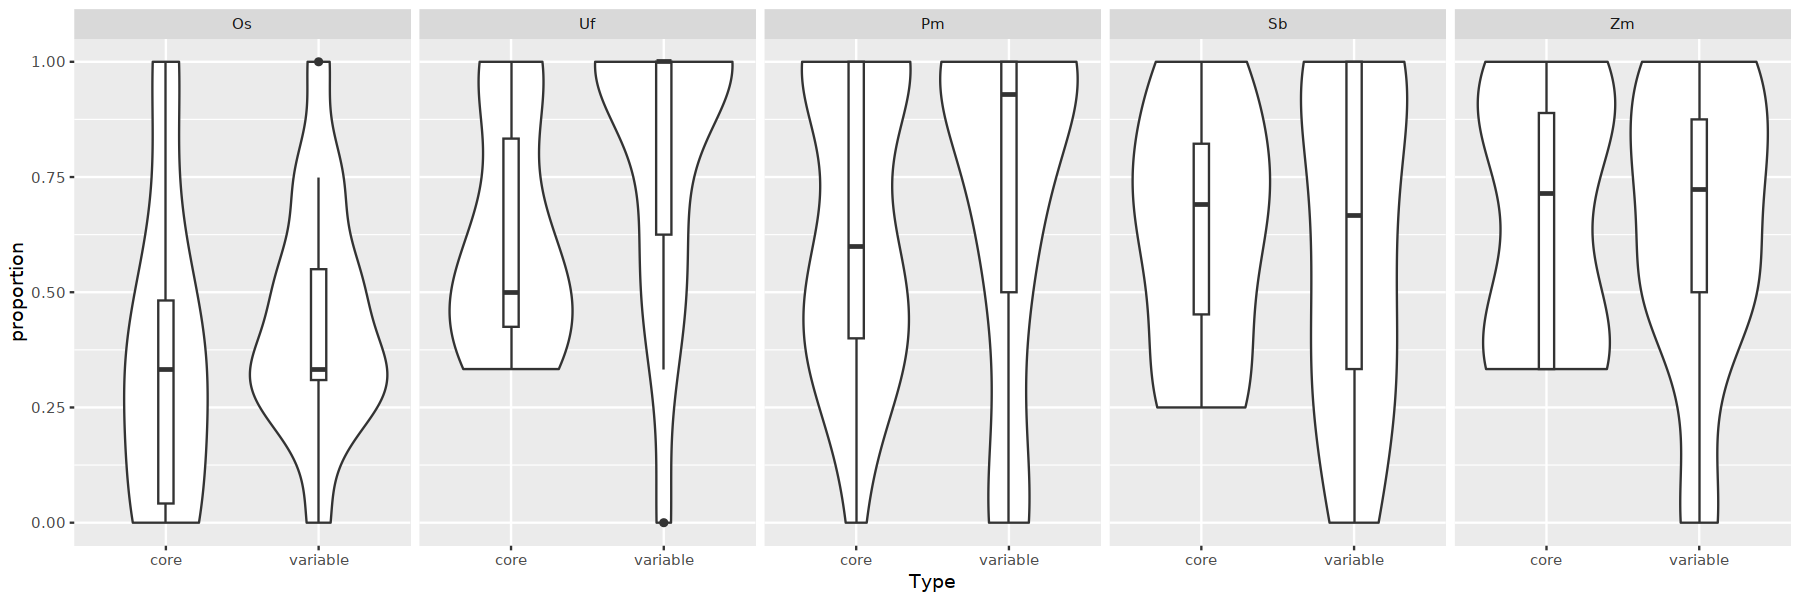

In [63]:

options(repr.plot.width=5, repr.plot.height=5)
combined_gene_family_class.no_c3 <- combined_gene_family_class %>% 
    dplyr::filter(species != "Os") %>% 
    dplyr::filter(acr_type_cons_noncons == "conserved_acrs_all") %>% 
    ggplot(., aes(x = Type, y = proportion)) + geom_violin() +
    geom_boxplot(width=0.1)

combined_gene_family_class.no_c3


options(repr.plot.width=15, repr.plot.height=5)
combined_gene_family_class$species <- factor(combined_gene_family_class$species, 
                                             levels = c("Os", "Uf", "Pm", "Sb", "Zm"))

# Filtering and plotting
combined_gene_family_class %>%
    dplyr::filter(acr_type_cons_noncons == "conserved_acrs_all") %>%
    ggplot(aes(x = Type, y = proportion)) +
    geom_violin() +
    geom_boxplot(width=0.1) +
    facet_grid(. ~ species)

In [67]:
head(combined_gene_family)

locus,species,loci,gene_family,number,acr_cell_type_specific_class,enzyme_location,total_acrs,acr_class,acr_count,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
Os__AlaAT_1,Os,AlaAT_1,AlaAT,1,broadly_accessible,mesophyll,1,conserved_acr_count,0,0.0000000
Os__AlaAT_1,Os,AlaAT_1,AlaAT,1,broadly_accessible,mesophyll,1,non_conserved_acrs,1,1.0000000
Os__AlaAT_2,Os,AlaAT_2,AlaAT,2,broadly_accessible,mesophyll,6,conserved_acr_count,2,0.3333333
Os__AlaAT_2,Os,AlaAT_2,AlaAT,2,broadly_accessible,mesophyll,6,non_conserved_acrs,4,0.6666667
Os__AlaAT_3,Os,AlaAT_3,AlaAT,3,broadly_accessible,mesophyll,4,conserved_acr_count,2,0.5000000
Os__AlaAT_3,Os,AlaAT_3,AlaAT,3,broadly_accessible,mesophyll,4,non_conserved_acrs,2,0.5000000


In [80]:
unique(combined_gene_family_class$acr_cell_type_specific_class)

[1] "broadly_accessible"                          
 [2] "bundle_sheath,mesophyll"                     
 [3] "mesophyll"                                   
 [4] "unknown_cells_2"                             
 [5] "protoderm"                                   
 [6] "bundle_sheath,epidermis,mesophyll"           
 [7] "epidermis,unknown_cells_1"                   
 [8] "bundle_sheath,companion_cell"                
 [9] "bundle_sheath,unknown_cells_2"               
[10] "epidermis,protoderm,unknown_cells_1"         
[11] "unknown_cells_1"                             
[12] "bundle_sheath"                               
[13] "epidermis"                                   
[14] "mesophyll,unknown_cells_2"                   
[15] "bundle_sheath,mesophyll,unknown_cells_2"     
[16] "epidermis,protoderm"                         
[17] "bundle_sheath,companion_cells_sieve_elements"
[18] "companion_cells_sieve_elements"              
[19] "procambium"                                  
[20] "procambial_meristem"                         
[21] "bundle_sheath,mesophyll,procambial_meristem" 
[22] "epidermis,mesophyll"                         
[23] "epidermis,mesophyll,protoderm"               
[24] "bundle_sheath,epidermis"

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`
Caused by error in `$<-.data.frame`:
! replacement has 1 row, data has 0”


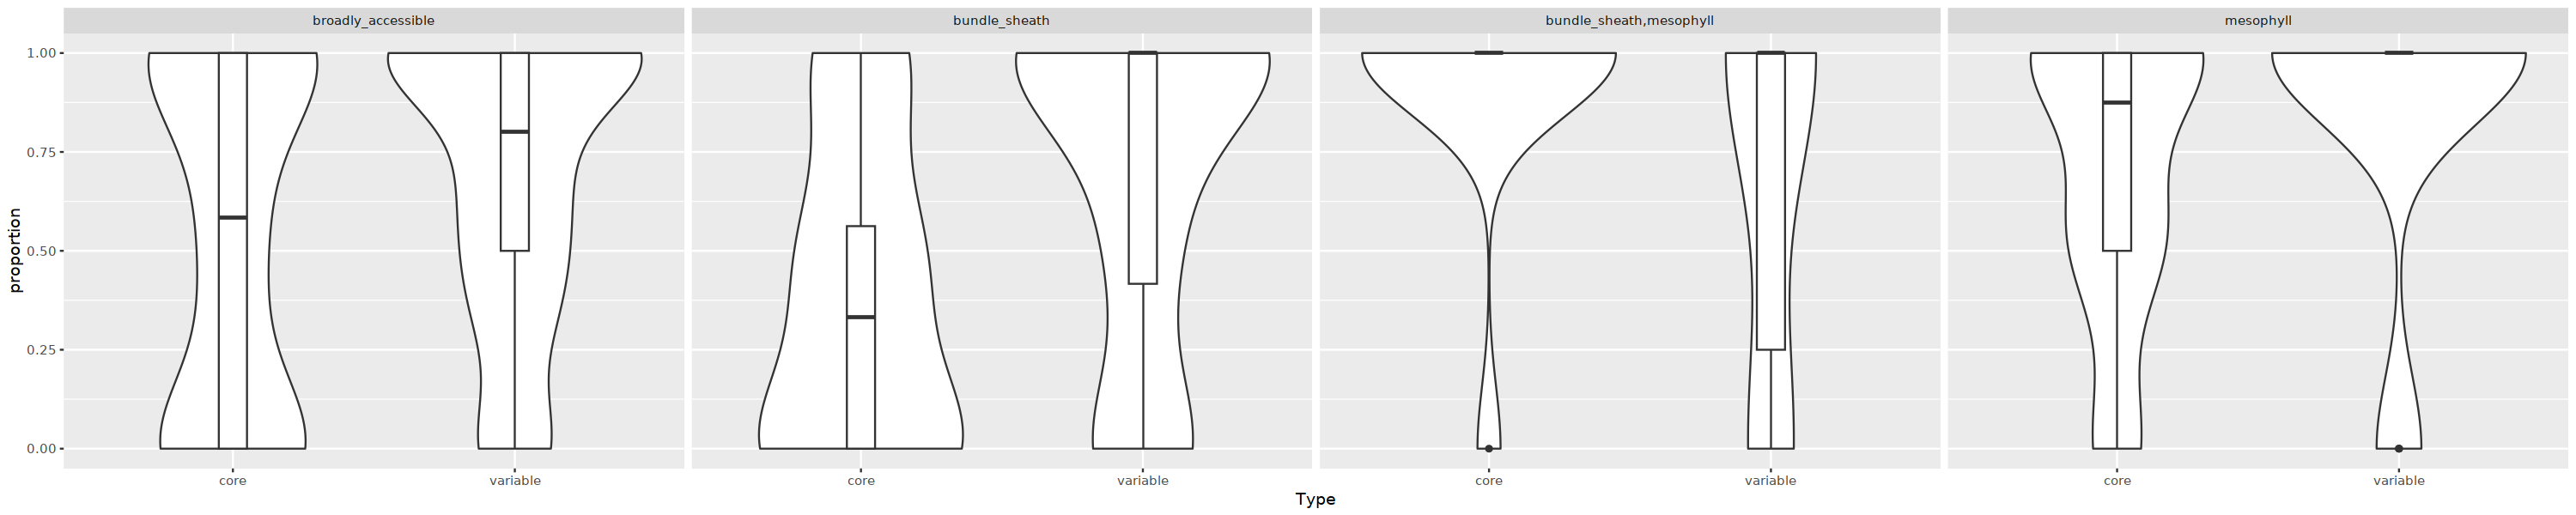

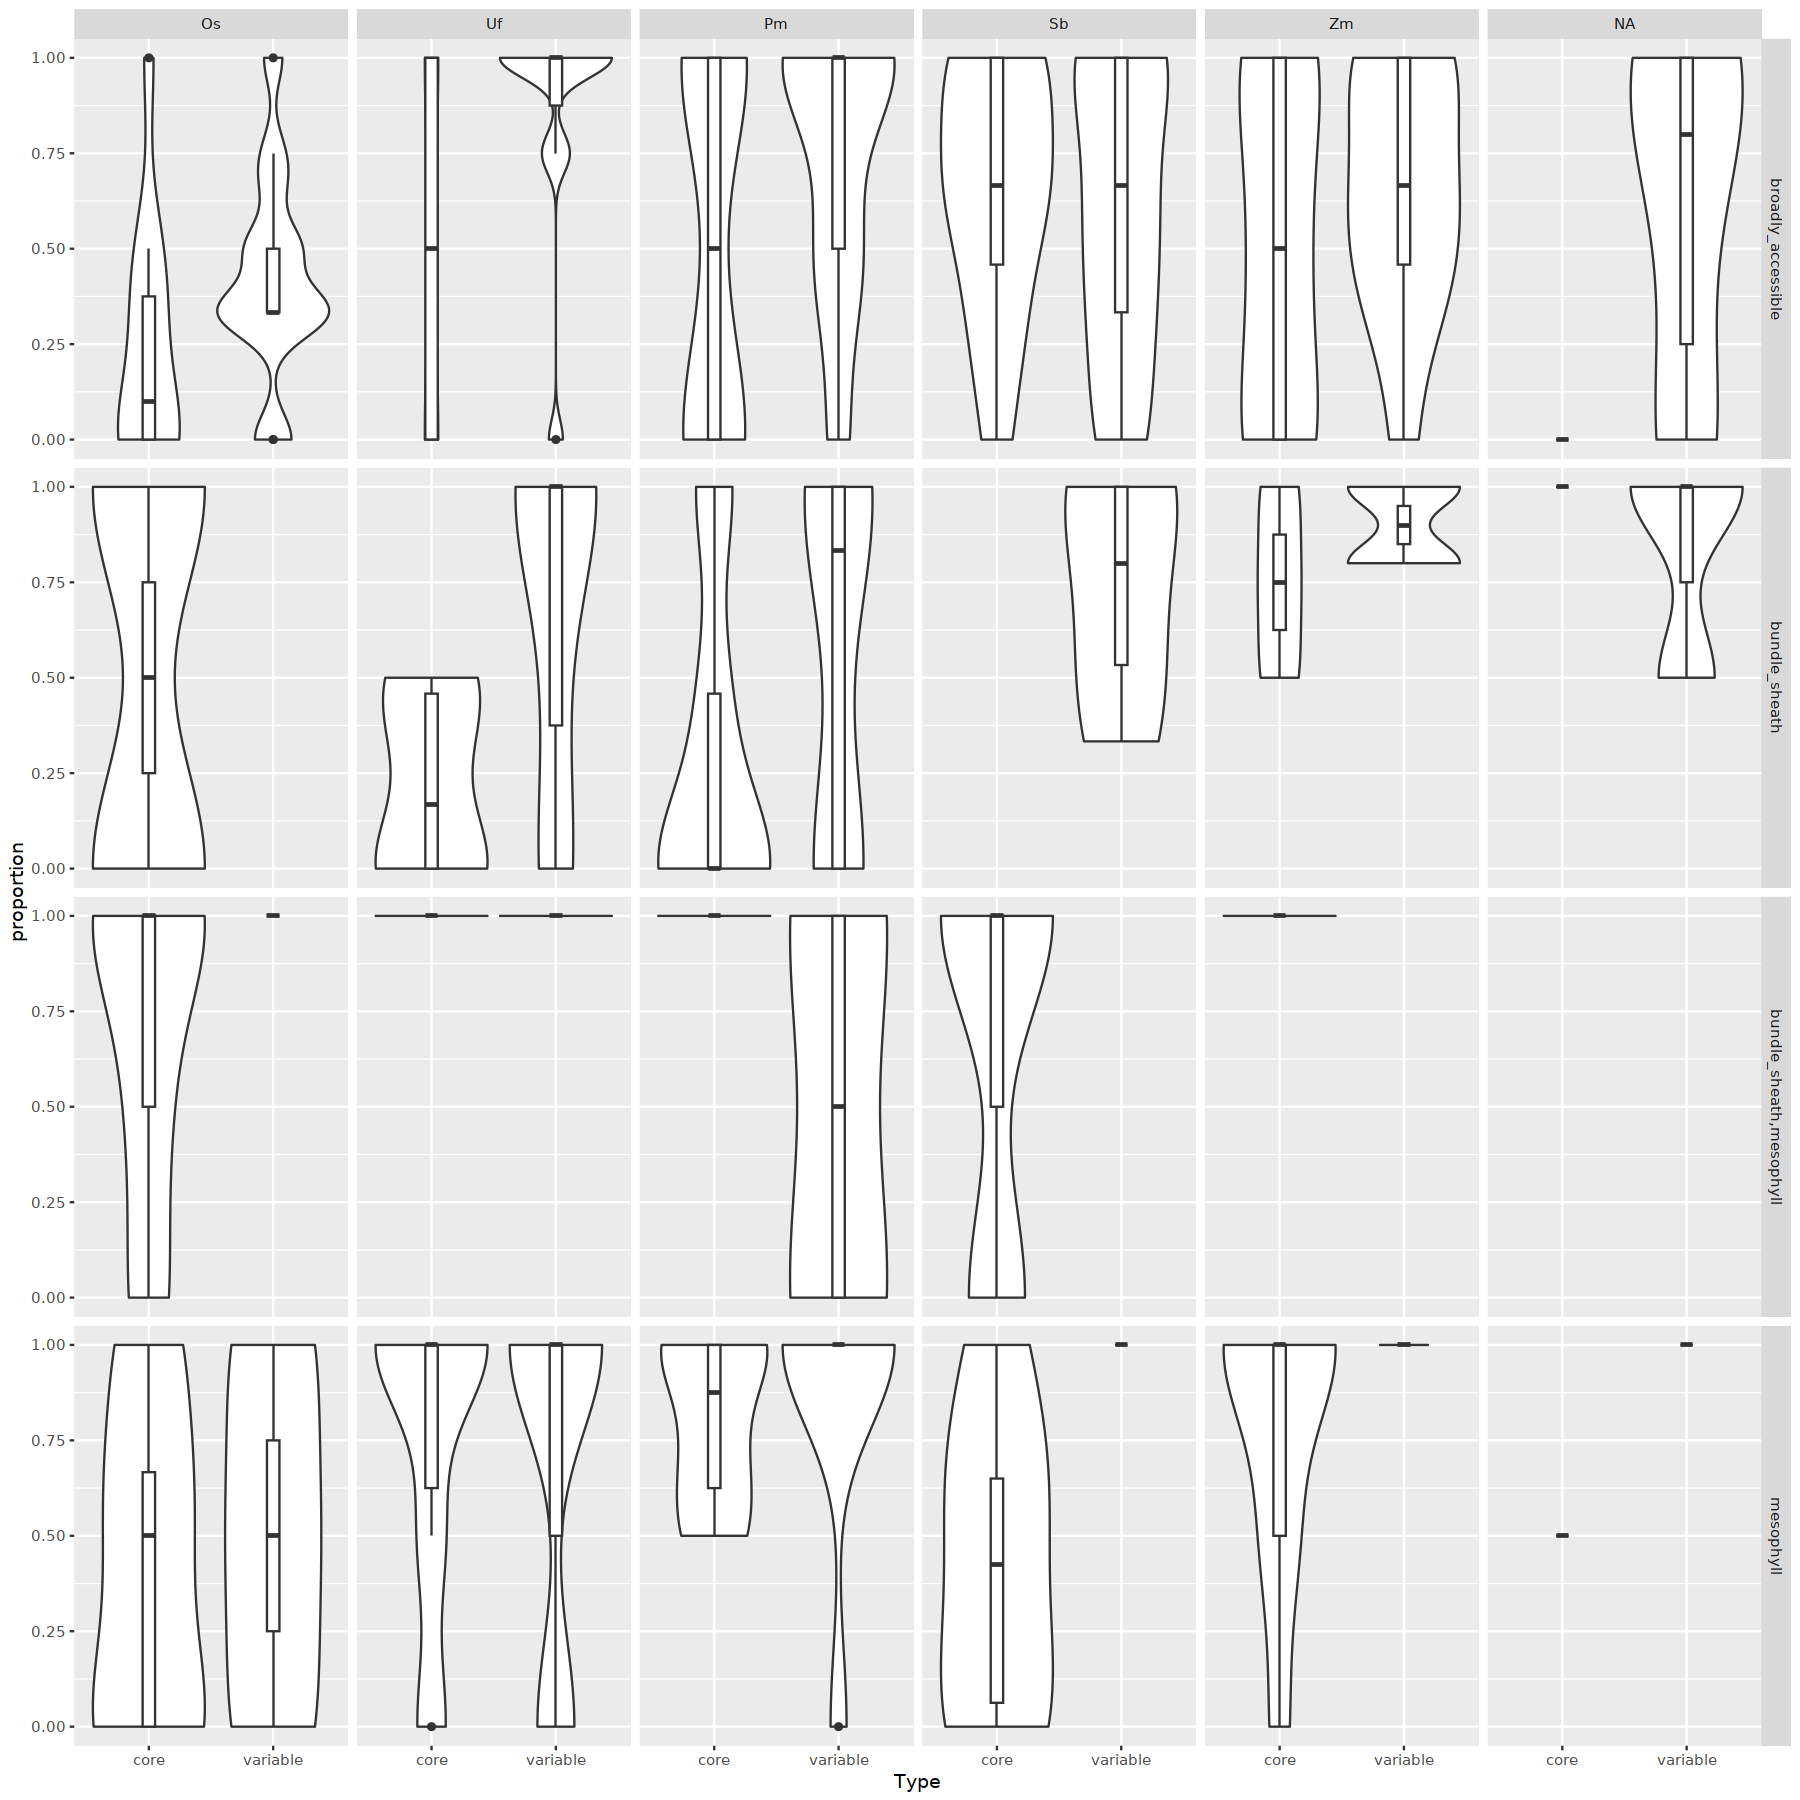

In [87]:
combined_gene_family_class <- left_join(combined_gene_family, enzyme_family_class, by = c("gene_family"))

options(repr.plot.width=25, repr.plot.height=5)
combined_gene_family_class.no_c3 <- combined_gene_family_class %>% 
    dplyr::filter(species != "Os") %>% 
    dplyr::filter(acr_class == "conserved_acr_count") %>% 
    dplyr::filter(acr_cell_type_specific_class %in% c("mesophyll", "bundle_sheath", "broadly_accessible", "bundle_sheath,mesophyll")) %>% 
    ggplot(., aes(x = Type, y = proportion)) + geom_violin() +
    geom_boxplot(width=0.1) + facet_grid(.~acr_cell_type_specific_class)

combined_gene_family_class.no_c3


options(repr.plot.width=15, repr.plot.height=15)
combined_gene_family_class$species <- factor(combined_gene_family_class$species, 
                                             levels = c("Os", "Uf", "Pm", "Sb", "Zm"))


options(repr.plot.width=15, repr.plot.height=15)
# Filtering and plotting
combined_gene_family_class %>%
    dplyr::filter(acr_class == "conserved_acr_count") %>%
    dplyr::filter(acr_cell_type_specific_class %in% c("mesophyll", "bundle_sheath", "broadly_accessible", "bundle_sheath,mesophyll")) %>% 
    ggplot(., aes(x = Type, y = proportion)) +
    geom_violin() +
    geom_boxplot(width=0.1) +
    facet_grid(acr_cell_type_specific_class ~species )

In [96]:
# bs_specific_enzymes_bs_acrs <- combined_gene_family %>% 
#     dplyr::filter(cts_acts == "bundle_sheath") #&& type == "bundle_sheath")

# ms_specific_enzymes_ms_acrs <- combined_gene_family %>% 
#     dplyr::filter(cts_acts == "mesophyll") # && type == "mesophyll")


# ms_specific_enzymes_bs_acrs <- combined_gene_family %>% 
#     dplyr::filter(cts_acts == "mesophyll" && type == "bundle_sheath")


# options(repr.plot.width=20, repr.plot.height=20)
# # Generate the barplot
# ggplot(bs_specific_enzymes_bs_acrs, aes(x = name, y = proportion, fill = acr_class)) +
#   geom_bar(stat = "identity") +
#   #geom_text(vjust = -0.5, position = position_dodge(width = 0.9)) +
#    labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
#    theme_minimal() +
#   facet_wrap(.~gene_family, scales = "free") +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) + 
#     ggtitle("BS Speficifc ACR Conservastion") # Adjust text angle and size for better readability

# ggplot(ms_specific_enzymes_ms_acrs, aes(x = name, y = proportion, fill = acr_class)) +
#   geom_bar(stat = "identity") +
#   #geom_text(vjust = -0.5, position = position_dodge(width = 0.9)) +
#    labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
#    theme_minimal() +
#   facet_wrap(.~gene_family, scales = "free") +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) +# Adjust text angle and size for better readability
#   ggtitle("MS Speficifc ACR Conservastion")


# # ggplot(ms_specific_enzymes_bs_acrs, aes(x = name, y = proportion, fill = acr_class)) +
# #   geom_bar(stat = "identity") +
# #   #geom_text(vjust = -0.5, position = position_dodge(width = 0.9)) +
# #    labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
# #    theme_minimal() +
# #   facet_wrap(.~gene_family, scales = "free") +
# #   theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) # Adjust text angle and size for better readability

ERROR: [1m[33mError[39m in `dplyr::filter()`:[22m
[1m[22m[36mℹ[39m In argument: `cts_acts == "bundle_sheath"`.
[1mCaused by error:[22m
[33m![39m object 'cts_acts' not found


In [ ]:
combined_gene_family <- combined_gene_family %>%
  group_by(name, acr_class) %>%
  mutate(total = sum(acr_count)) %>%
  ungroup() %>%
  mutate(proportion = acr_count / total)

# Generate the barplot
ggplot(combined_gene_family, aes(x = name, y = proportion, fill = acr_class)) +
  geom_bar(stat = "identity") +
  labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
  theme_minimal() +
  facet_wrap(cts_acts~gene_family, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) # Adjust text angle and 

In [12]:
combined_counts_cons

locus,species,loci,gene_family,number,cell_type,number_acrs_per_locus,number_passing_loci,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
Sb__CA_2,Sb,CA_2,CA,2,ms,7,7,1.0000000
Uf__RBCS_3,Uf,RBCS_3,RBCS,3,bs,7,NA,NA
Pm__NADME_1,Pm,NADME_1,NADME,1,bs,6,NA,NA
Uf__PPDK_1,Uf,PPDK_1,PPDK,1,ms,6,5,0.8333333
Pm__NADME_2,Pm,NADME_2,NADME,2,bs,5,5,1.0000000
Sb__NADPME_2,Sb,NADPME_2,NADPME,2,bs,5,4,0.8000000
Sb__PEPC_1,Sb,PEPC_1,PEPC,1,ms,5,4,0.8000000
Uf__PEPCK_1,Uf,PEPCK_1,PEPCK,1,bs,5,3,0.6000000
Zm__CA_3,Zm,CA_3,CA,3,ms,5,5,1.0000000


In [56]:
combined_df %>% 
    dplyr::filter(locus == "Pm__NADME_1")

qChr,qStart,qEnd,acr,acr_cell_type,locus,pval,refFile,rChr,rStart,rEnd,rName,rWidth,cell_type,species
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
CM009690.2,32769759,32770260,scACR_5398,bundle_sheath,Pm__NADME_1,0.0000000000,.,.,-1,-1,.,0,bs,PM
CM009690.2,32771517,32772018,scACR_5399,bundle_sheath,Pm__NADME_1,0.0001666611,.,.,-1,-1,.,0,bs,PM
CM009690.2,32773434,32773935,scACR_5401,bundle_sheath,Pm__NADME_1,0.0001333289,.,.,-1,-1,.,0,bs,PM
CM009690.2,32777764,32778265,scACR_5402,bundle_sheath,Pm__NADME_1,0.0000000000,.,.,-1,-1,.,0,bs,PM
CM009690.2,32779390,32779891,scACR_5403,bundle_sheath,Pm__NADME_1,0.0000000000,.,.,-1,-1,.,0,bs,PM
CM009690.2,32786382,32786883,scACR_5405,bundle_sheath,Pm__NADME_1,0.0000000000,.,.,-1,-1,.,0,bs,PM
